# **Laboratorio 1: Regresión en Boston**

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [3]:
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston['DESCR'])   # descripción del dataset


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
import pandas
df_boston_data = pandas.DataFrame(data=boston['data'], columns=boston['feature_names'])
# se visualizan las primeras filas del dataframe boston
df_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# se visualizan los estadísticos descriptivos del dataframe boston
df_boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
# se visualizan los estadísticos descriptivos de la variable objetivo
df_target = pandas.DataFrame(boston["target"], columns=["target"])
df_target.describe()

,target
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [10]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.





1. El conjunto de datos trata sobre precios de vivienda de Boston, el cual fue tomado de la biblioteca StatLib que se mantiene en la Universidad Carnegie Mellon. Contiene 506 muestras con 13 atributos.

2. La variable que hay que predecir es el atributo **MEDV**, valor promedio de la vivienda valuada en miles de dólares que se encuentra en el vector **TARGET**.

3. Como atributo tenemos los siguientes datos:
- **CRIM:**     tasa de criminalidad per cápita por ciudad 
- **ZN:**       proporción terrenos residenciales mayores a 2322 m2 (25000 sqr ft)
- **INDUS:**    proporción de superficie de negocios mayoristas por ciudad
- **CHAS:**     variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
- **NOX:**      concentración de óxidos nítricos (partes por 10 millones)
- **RM:**       número medio de habitaciones por vivienda
- **AGE:**      proporción de viviendas construidas antes de 1940
- **DIS:**      distancias ponderadas a cinco centros de empleo de Boston
- **RAD:**      índice de accesibilidad a carreteras radiales
- **TAX:**      tasa de impuesto a la propiedad sobre el valor total de la propiedad cada \$ 10,000
- **PTRATIO:**  relación alumno-profesor por localidad
- **B:**       1000 (Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
- **LSTAT:**    % del nivel socioeconómico bajo de la población  

4. Los atributos determinantes para la predicción son los siguientes:
- **CRIM**     tasa de criminalidad per cápita por ciudad 
- **INDUS**    proporción de superficie de negocios mayoristas por ciudad
- **CHAS**     variable ficticia Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
- **RM**       número medio de habitaciones por vivienda
- **AGE**      proporción de viviendas construidas antes de 1940
- **DIS**      distancias ponderadas a cinco centros de empleo de Boston
- **RAD**      índice de accesibilidad a carreteras radiales
- **TAX**      tasa de impuesto a la propiedad sobre el valor total de la propiedad cada $10,000
- **LSTAT**    % del nivel socioeconómico bajo de la población                 

5. El atributo **B** que representa la proporción de negros por ciudad genera un dilema ético, ya que apunta al racismo.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

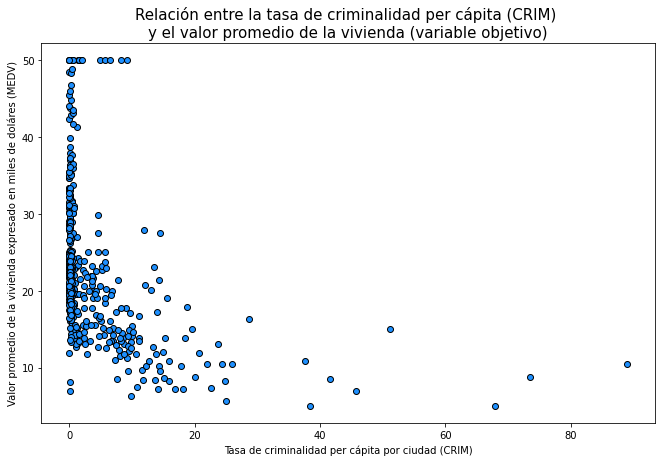

In [30]:
# 1. 
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.figure(figsize=(11,7))
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title("Relación entre la tasa de criminalidad per cápita (CRIM) \ny el valor promedio de la vivienda (variable objetivo)", fontsize = 15)
plt.xlabel('Tasa de criminalidad per cápita por ciudad (CRIM)')
plt.ylabel('Valor promedio de la vivienda expresado en miles de doláres (MEDV)')
plt.show()

In [56]:
def add_subplot(axes, feature):
  selector = (boston['feature_names'] == feature)
  axes.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
  #axes.set_title(feature)
  axes.set_xlabel(feature)
  axes.set_ylabel('MEDV')

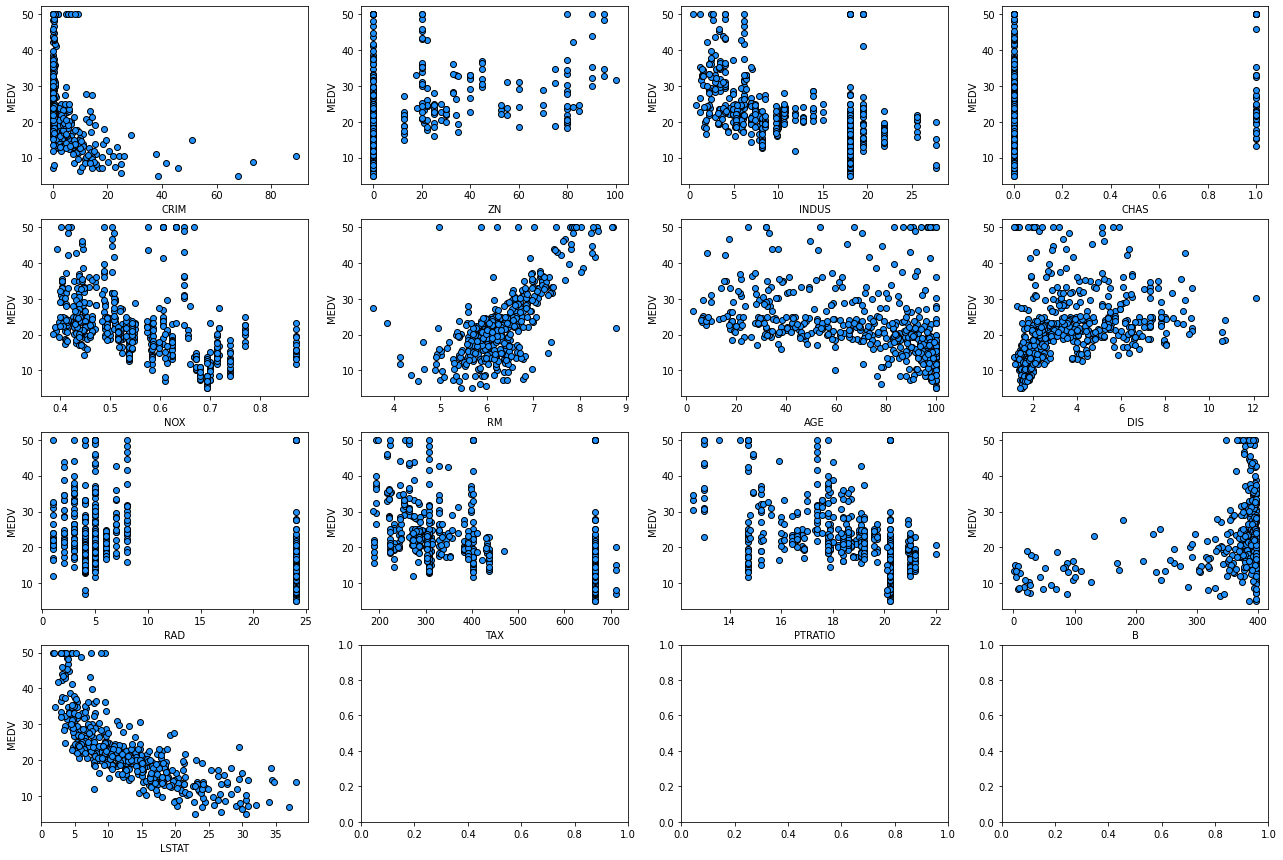

In [58]:
fig, axes = plt.subplots(4, 4, figsize=(22,15))

add_subplot(axes[0,0],'CRIM')
add_subplot(axes[0,1],'ZN')
add_subplot(axes[0,2],'INDUS')
add_subplot(axes[0,3],'CHAS')
add_subplot(axes[1,0],'NOX')
add_subplot(axes[1,1],'RM')
add_subplot(axes[1,2],'AGE') 
add_subplot(axes[1,3],'DIS')
add_subplot(axes[2,0],'RAD')
add_subplot(axes[2,1],'TAX')
add_subplot(axes[2,2],'PTRATIO')
add_subplot(axes[2,3],'B')
add_subplot(axes[3,0],'LSTAT')

plt.show()

2. Busco la correlación entre variables




In [59]:
df_boston = pandas.concat([df_boston_data, df_target], axis=1)
df_boston_corr = df_boston.corr()
filter = abs(df_boston_corr["target"]) >= 0
df_boston_corr.where(filter).sort_values('target')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.543993,0.374044,-0.366087,1.000000,-0.737663
PTRATIO,0.289946,-0.391679,0.383248,-0.121515,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929


<function matplotlib.pyplot.show>

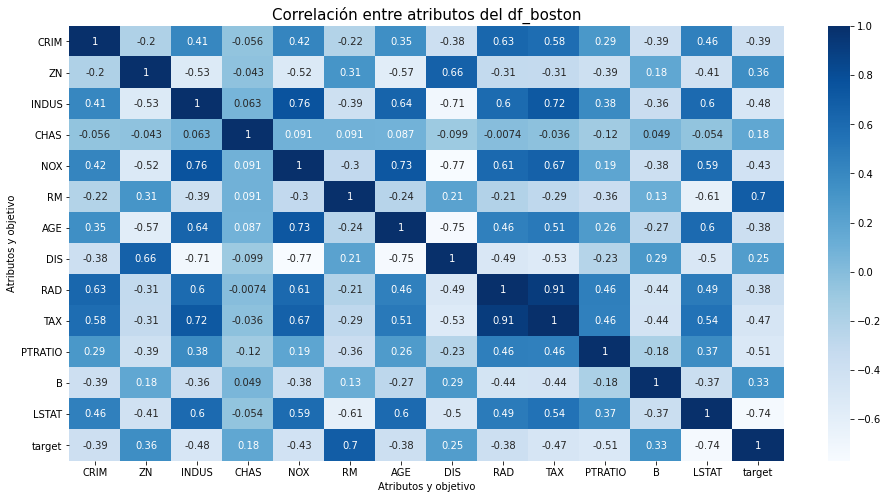

In [68]:
plt.figure(figsize=(16,8))
seaborn.heatmap(df_boston_corr, cmap= 'Blues', annot=True)
plt.title("Correlación entre atributos del df_boston", fontsize = 15)
plt.ylabel('Atributos y objetivo')
plt.xlabel('Atributos y objetivo')
plt.show

3. Los atributos más informativos para la predicción son:
 1. **LSTAT (-0.74):** disminuye el valor de la vivienda
 1. **RM (0.70):** incrementa el valor de la vivienda
 1. **PTRATIO (-0.5):** disminuye el valor de la vivienda

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [69]:
# 1.
feature = 'RM'  
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [74]:
# 2. Instanciar y entrenar acá.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train_f,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
#model.fit(X_train_f,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
# 3. Predecir y evaluar acá.
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

In [76]:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:0.2f}')
print(f'Test error: {test_error:0.2f}')

Train error: 42.82
Test error: 46.91


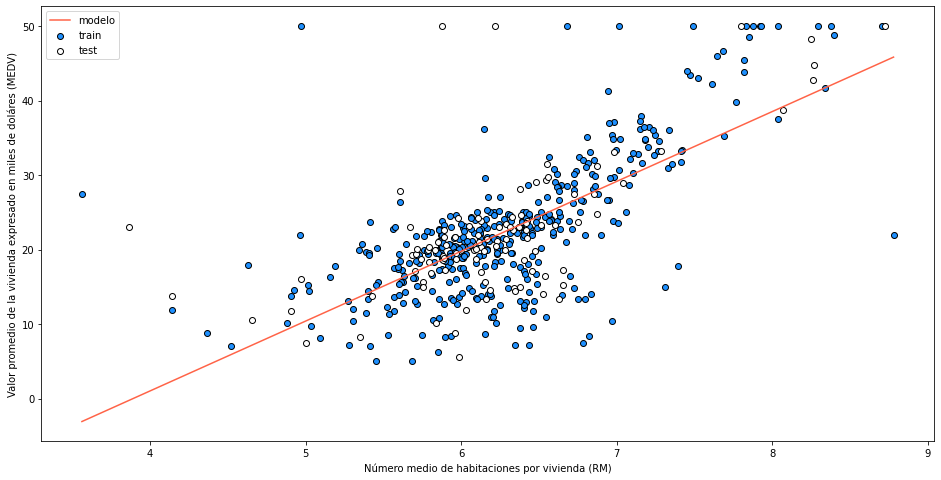

In [82]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(16,8))
plt.plot(x, model.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.ylabel('Valor promedio de la vivienda expresado en miles de doláres (MEDV)')
plt.xlabel('Número medio de habitaciones por vivienda (RM)')
plt.legend()
plt.show()

 Al utilizar el atributo 'RM' se evidencia que a mayor número de habitaciones, mayor será el precio de la propiedad. Utilizando el modelo de regresión lineal se obtiene un error elevado por lo que no tiene una buena precisión. 

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [97]:
# 1. Resolver acá.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    #print(f'Degree: {degree} \tTrain error: {train_error:0.2f} \tTest error: {test_error:0.2f}')
    train_errors.append(train_error)
    test_errors.append(test_error)


    #C: print dataframe with errors
df_error = pd.DataFrame(degrees,columns=['degree'])
df_error['Error en training'] = train_errors
df_error['Error en testing'] = test_errors
df_error.round(1).set_index('degree')

,Error en training,Error en testing
degree,,
0,85.1,81.6
1,42.8,46.9
2,37.7,39.8
3,36.4,39.8
4,34.8,41.6
5,33.1,41.0
6,33.1,41.0
7,33.1,42.4
8,33.1,42.4


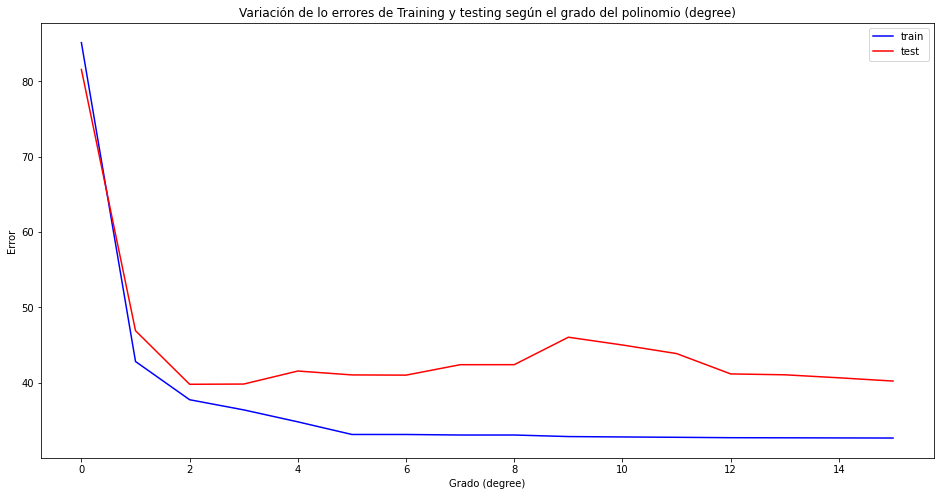

In [99]:
# 2. Graficar curvas de error acá.
plt.figure(figsize=(16,8))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.legend()
plt.title('Variación de lo errores de Training y testing según el grado del polinomio (degree)')
plt.xlabel("Grado (degree)")
plt.ylabel("Error")
plt.show()

**3.** A partir del grado 4 hay un leve sobreentrenamiento.


**4.** Se seleccionó el polinomio de grado 2 ya que mejor se ajusta de acuerdo a lo que se observa con los errores obtenidos. 

In [ ]:
# 4. Reconstruir mejor modelo acá y graficar.
degree = 2

# train:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

# predict:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

# evaluate:
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Train error: {train_error:0.2f} \tTest error: {test_error:0.2f}')


Train error: 37.75 	Test error: 39.79


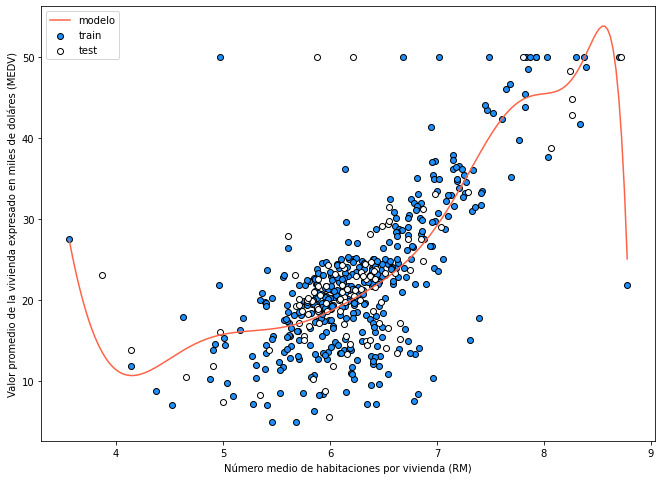

In [102]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.figure(figsize=(11,8))
plt.plot(x, model.predict(x), color="tomato", label="modelo")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.ylabel('Valor promedio de la vivienda expresado en miles de doláres (MEDV)')
plt.xlabel('Número medio de habitaciones por vivienda (RM)')
#plt.title(feature)
plt.legend()
plt.show()

 **5.** El modelo polinomial de grado 2 es el que mejor se ajusta a esta variable. 
 

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [103]:
# 1. Resolvercon dos atributos:
selector = (boston['feature_names'] == 'LSTAT') | (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'PTRATIO')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

In [120]:
# 2. Resolver acá.
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    #print(f'Degree: {degree} \tTrain error: {train_error:0.2f} \tTest error: {test_error:0.2f}')
    train_errors.append(train_error)
    test_errors.append(test_error)

    #C: print dataframe with errors
df_error2 = pd.DataFrame(degrees,columns=['degree'])
df_error2['Error en training'] = train_errors
df_error2['Error en testing'] = test_errors
df_error2.round(1).set_index('degree')

,Error en training,Error en testing
degree,,
1,23.7,4.170000e+01
2,14.2,3.000000e+01
3,12.5,3.100000e+01
4,9.5,3.790000e+01
5,8.2,3.220000e+01
6,7.2,7.950000e+01
7,6.6,2.328000e+03
8,7.1,7.729100e+03
9,6.4,1.042360e+04


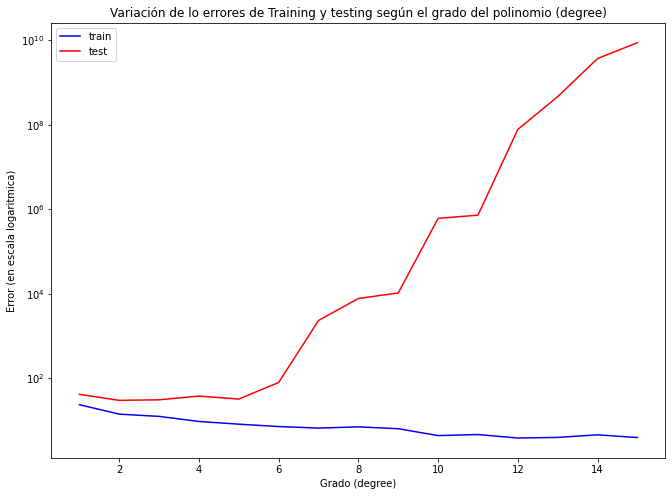

In [108]:
plt.figure(figsize=(11,8))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.yscale("log")
plt.legend()
plt.title('Variación de lo errores de Training y testing según el grado del polinomio (degree)')
plt.xlabel("Grado (degree)")
plt.ylabel("Error (en escala logaritmica)")
plt.show()

**3.** Si comparamos la regresión polinomial con un sólo atributo con esta última realizada con más de  un atributo se evidencia que los errores tanto con el set de Train como con el de Test disminuyen, por lo que se puede afirmar que existe una mejora en el ajuste del modelo.

Al trabajar con tres atributos observamos una mejora en el modelo utilizando el polinomio de grado 4.

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.




In [ ]:
train_errors = []
test_errors = []
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    print(f'Degree: {degree} \tTrain error: {train_error:0.2f} \tTest error: {test_error:0.2f}')
    train_errors.append(train_error)
    test_errors.append(test_error)

Degree: 1 	Train error: 19.33 	Test error: 33.45
Degree: 2 	Train error: 6.31 	Test error: 25.22
Degree: 3 	Train error: 0.00 	Test error: 1050370.66
Degree: 4 	Train error: 0.00 	Test error: 981357.44
Degree: 5 	Train error: 0.00 	Test error: 200225.49
Degree: 6 	Train error: 0.00 	Test error: 200922.26
Degree: 7 	Train error: 0.00 	Test error: 24855.36
Degree: 8 	Train error: 0.00 	Test error: 173598.26
Degree: 9 	Train error: 0.00 	Test error: 562174.26


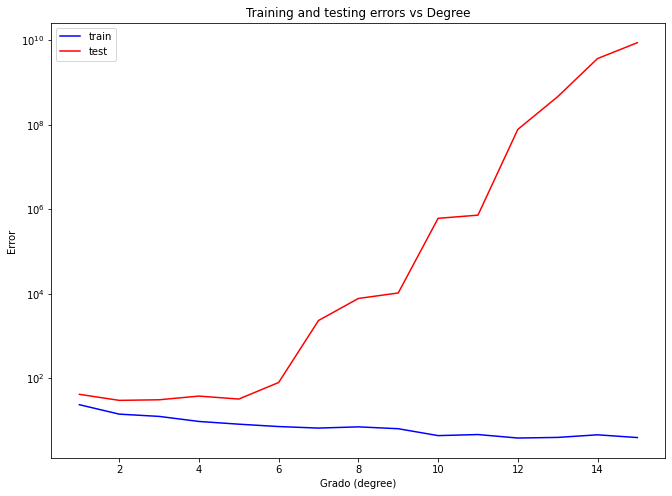

In [122]:
plt.figure(figsize=(11,8))
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
plt.yscale('log')
plt.legend()
plt.title('Training and testing errors vs Degree')
plt.xlabel("Grado (degree)")
plt.ylabel("Error")
plt.show()

Al utilizar todos los atributos se observa que el mejor ajuste lo obtenemos al utilizar un polinomio de grado 2, ya que a partir del grado 3 se dispara el error del test. Esto significa que utilizar todos los atributos no se observa una mejora en el modelo.

Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?

In [123]:
from sklearn.linear_model import Ridge
train_errors = []
test_errors = []
alphas = np.linspace(1e-4, 0.1, 4)
degree = 3
for alpha in alphas:
    # A: train:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
    model.fit(X_train, y_train)
    
    # B:
    # predict:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    print(f'Alpha: {alpha} \tTrain error: {train_error:0.2f} \tTest error: {test_error:0.2f}')
    train_errors.append(train_error)
    test_errors.append(test_error)

Alpha: 0.0001 	Train error: 1.11 	Test error: 488.31
Alpha: 0.033400000000000006 	Train error: 1.11 	Test error: 488.31
Alpha: 0.06670000000000001 	Train error: 2.62 	Test error: 518.10
Alpha: 0.1 	Train error: 2.62 	Test error: 518.10


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


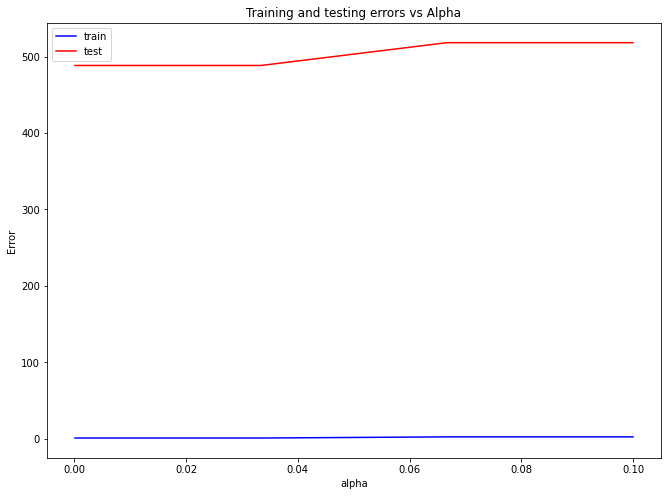

In [124]:
plt.figure(figsize=(11,8))
plt.plot(alphas, train_errors, color="blue", label="train")
plt.plot(alphas, test_errors, color="red", label="test")
#plt.yscale('log')
plt.legend()
plt.title('Training and testing errors vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

Utilizando el polinomio de grado 3, observamos una mejora sustancial en el Test error aplicando regularización "ridge".

Sin aplicar regularización obteníamos estos valores de error.

| Degree | Train error | Test error |
| -- | -- | -- |
|  1 | 19.33 | 33.45 |
|  2 | 6.31  | 25.22 |
|  3 | 0.00  | 1050370.66 |



Si comparamos el error en los polinomios de grado 3 vemos que de 1050370.66 se redujo a 497 aprox
